In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = np.genfromtxt('../results/optimal_timing.txt', skip_header=6, 
                     delimiter=',', autostrip=True, dtype='f8')

data = data[:,:-1]
data_fits = data[:,::2]
data_times = data[:,1::2] * (1E-6)

def sep_data(th_i, acc, data_fits=data_fits, data_times=data_times):
    temp_fits  = data_fits[th_i::9]
    temp_times = data_times[th_i::9]
    # temp_sol_time = temp_times[np.argwhere(temp_fits<acc)[0,0]]

    temp = np.argmax(temp_fits<acc, axis=1)
    temp_sol_time = np.zeros_like(temp, dtype='f8')
    for i in range(len(temp)):
        temp_sol_time[i] = temp_times[i,temp[i]]

    temp_sol_time[temp_sol_time != 0]

    temp_fits  = np.mean(data_fits[th_i::9],axis=0)
    std_fits = np.std(data_fits[th_i::9],axis=0)

    temp_times = np.mean(data_times[th_i::9],axis=0)
    std_times = np.std(data_times[th_i::9],axis=0)

    return temp_fits, temp_times, temp_sol_time, std_fits, std_times

acc=1E-6

th_01_fits, th_01_times, th_01_sol_time, th_01_fits_std, th_01_times_std = sep_data(0,acc)
th_02_fits, th_02_times, th_02_sol_time, th_02_fits_std, th_02_times_std = sep_data(1,acc)
th_04_fits, th_04_times, th_04_sol_time, th_04_fits_std, th_04_times_std = sep_data(2,acc)
th_06_fits, th_06_times, th_06_sol_time, th_06_fits_std, th_06_times_std = sep_data(3,acc)
th_08_fits, th_08_times, th_08_sol_time, th_08_fits_std, th_08_times_std = sep_data(4,acc)
th_10_fits, th_10_times, th_10_sol_time, th_10_fits_std, th_10_times_std = sep_data(5,acc)
th_12_fits, th_12_times, th_12_sol_time, th_12_fits_std, th_12_times_std = sep_data(6,acc)
th_14_fits, th_14_times, th_14_sol_time, th_14_fits_std, th_14_times_std = sep_data(7,acc)
th_16_fits, th_16_times, th_16_sol_time, th_16_fits_std, th_16_times_std = sep_data(8,acc)

sol_times = np.array([
    th_01_sol_time,
    th_02_sol_time,
    th_04_sol_time,
    th_06_sol_time,
    th_08_sol_time,
    th_10_sol_time,
    th_12_sol_time,
    th_14_sol_time,
    th_16_sol_time
])

violin_times = np.array([
    th_01_times,
    th_02_times,
    th_04_times,
    th_06_times,
    th_08_times,
    th_10_times,
    th_12_times,
    th_14_times,
    th_16_times
])

n_threads = np.array([1,2,4,6,8,10,12,14,16])
n_iterations = np.arange(len(data_fits[::9][0]))+1

/tmp/ipykernel_23477/2572098693.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


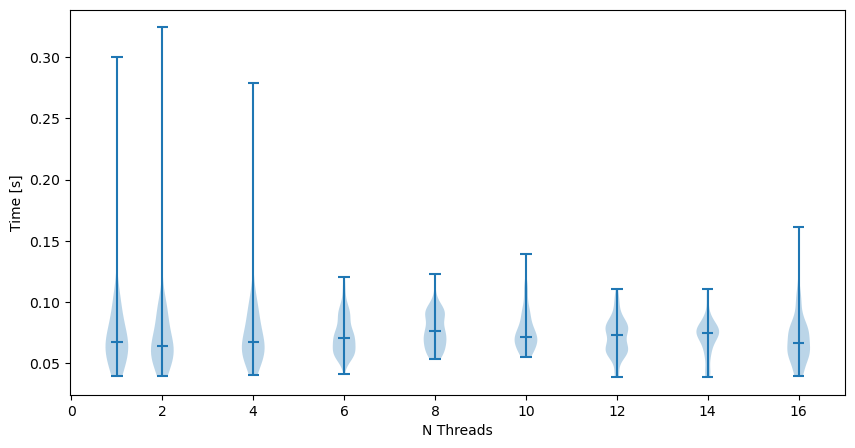

In [19]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)

ax1.violinplot(sol_times.T, n_threads, showmedians=True)

ax1.set_xlabel('N Threads')
ax1.set_ylabel('Time [s]')
fig.show()

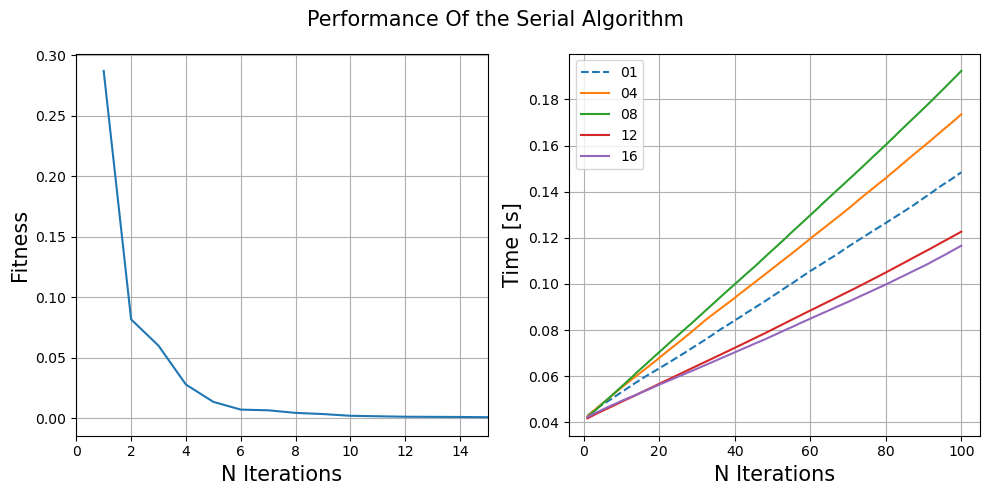

In [129]:
fig, ax1 = plt.subplots(1,2)
fig.set_size_inches(10,5)

ax1[0].plot(n_iterations, th_01_fits)
ax1[0].set_xlabel('N Iterations', fontsize=15)
ax1[0].set_ylabel('Fitness', fontsize=15)
ax1[0].set_xlim(0,15)
ax1[0].grid()

ax1[1].plot(n_iterations, th_01_times, label='01', linestyle='--')
# ax1[1].plot(n_iterations, th_02_times, label='02')
ax1[1].plot(n_iterations, th_04_times, label='04')
# ax1[1].plot(n_iterations, th_06_times, label='06')
ax1[1].plot(n_iterations, th_08_times, label='08')
# ax1[1].plot(n_iterations, th_10_times, label='10')
ax1[1].plot(n_iterations, th_12_times, label='12')
# ax1[1].plot(n_iterations, th_14_times, label='14')
ax1[1].plot(n_iterations, th_16_times, label='16')

ax1[1].legend()
ax1[1].set_xlabel('N Iterations', fontsize=15)
ax1[1].set_ylabel('Time [s]', fontsize=15)
# ax1[1].set_xlim(0,15)
ax1[1].grid()

fig.suptitle('Performance Of the Serial Algorithm', fontsize=15)

fig.tight_layout()

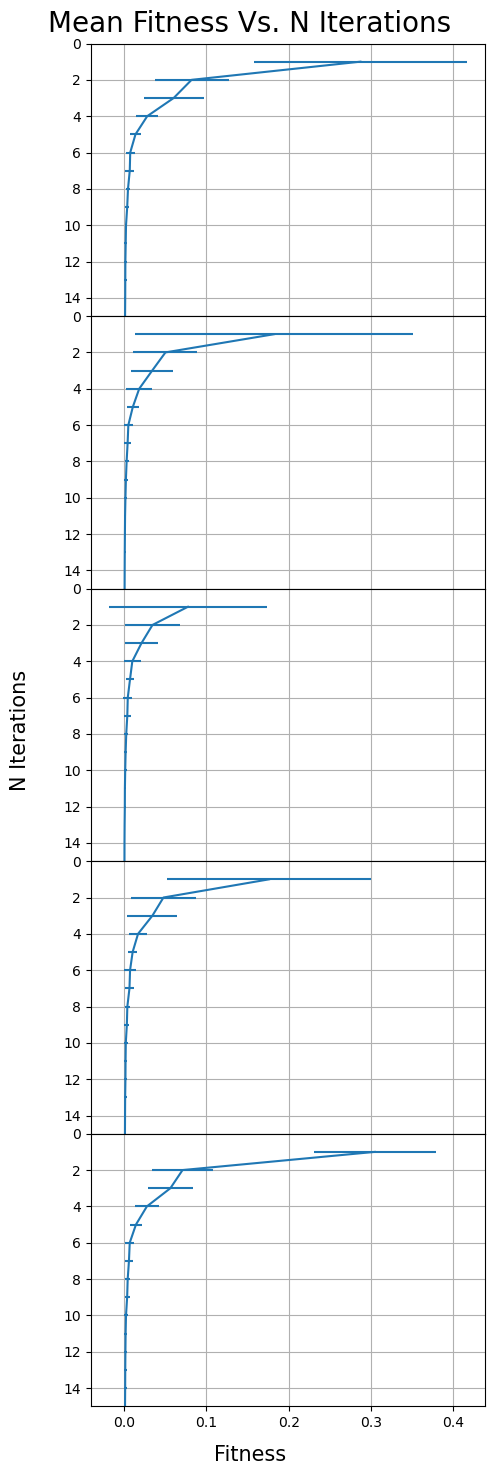

In [102]:
fig, ax1 = plt.subplots(5,1, sharex=True)
fig.set_size_inches(5,15)

ax1[0].errorbar(th_01_fits, n_iterations, xerr=th_01_fits_std)
# ax1[0].set_xlim(0,15)
ax1[0].set_ylim(0,15)
# ax1[0].set_title('N Threads : 1')
ax1[0].grid()
# ax1[0].invert_xaxis()
ax1[0].invert_yaxis()

ax1[1].errorbar(th_04_fits, n_iterations, xerr=th_04_fits_std)
# ax1[1].set_xlim(0,15)
ax1[1].set_ylim(0,15)
# ax1[1].set_title('N Threads : 4')
ax1[1].grid()
ax1[1].invert_yaxis()

ax1[2].errorbar(th_08_fits, n_iterations, xerr=th_08_fits_std)
# ax1[2].set_xlim(0,15)
ax1[2].set_ylim(0,15)
# ax1[2].set_title('N Threads : 8')
ax1[2].grid()
ax1[2].invert_yaxis()

ax1[3].errorbar(th_12_fits, n_iterations, xerr=th_12_fits_std)
# ax1[3].set_xlim(0,15)
ax1[3].set_ylim(0,15)
# ax1[3].set_title('N Threads : 12')
ax1[3].grid()
ax1[3].invert_yaxis()

ax1[4].errorbar(th_16_fits, n_iterations, xerr=th_16_fits_std)
# ax1[4].set_xlim(0,15)
ax1[4].set_ylim(0,15)
# ax1[4].set_title('N Threads : 16')
ax1[4].grid()
ax1[4].invert_yaxis()

fig.suptitle('Mean Fitness Vs. N Iterations', fontsize=20)
fig.supxlabel('Fitness', fontsize=15)
fig.supylabel('N Iterations', fontsize=15)

fig.tight_layout()

fig.subplots_adjust(hspace=0)

Text(0, 0.5, 'Times [s]')

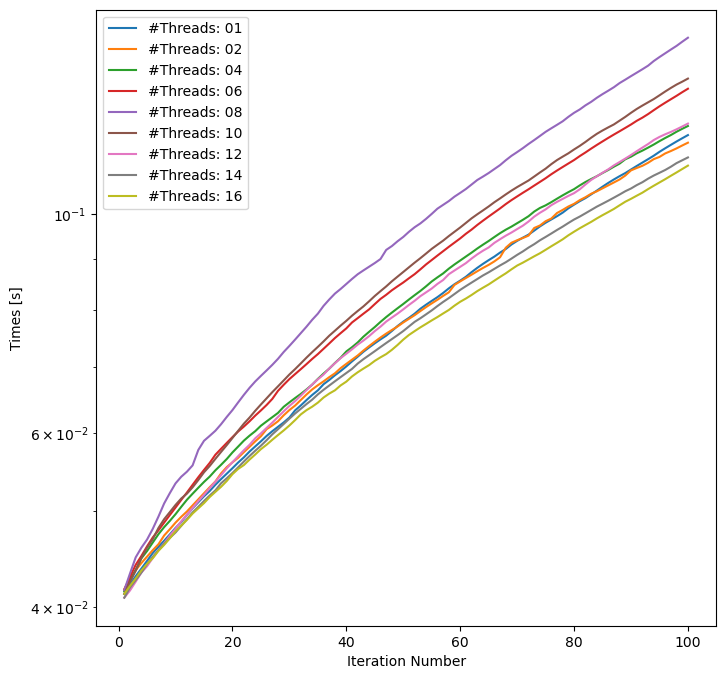

In [261]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8,8)

ax1.set_yscale('log')

ax1.plot(n_iterations, th_01_times, label='#Threads: 01')
ax1.plot(n_iterations, th_02_times, label='#Threads: 02')
ax1.plot(n_iterations, th_04_times, label='#Threads: 04')
ax1.plot(n_iterations, th_06_times, label='#Threads: 06')
ax1.plot(n_iterations, th_08_times, label='#Threads: 08')
ax1.plot(n_iterations, th_10_times, label='#Threads: 10')
ax1.plot(n_iterations, th_12_times, label='#Threads: 12')
ax1.plot(n_iterations, th_14_times, label='#Threads: 14')
ax1.plot(n_iterations, th_16_times, label='#Threads: 16')

ax1.legend()

ax1.set_xlabel('Iteration Number')
ax1.set_ylabel('Times [s]')